# **create_word_clouds**

In [7]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [9]:
from pymongo import MongoClient
client = MongoClient()
db = client.environment
sustainability_collection = db.sustainability

In [42]:
hashtags = []
for tweet in sustainability_collection.aggregate([
    {'$match': {'lang': 'en'}}]):
    hashtags.append(tweet['entities']['hashtags'])

In [62]:
hashtags

[[],
 [{'text': 'SPFAustralia', 'indices': [43, 56]},
  {'text': 'EHS', 'indices': [93, 97]},
  {'text': 'RiskManagement', 'indices': [99, 114]}],
 [{'text': 'affordablehousing', 'indices': [52, 70]},
  {'text': 'publictransport', 'indices': [71, 87]},
  {'text': 'sustainability', 'indices': [88, 103]}],
 [],
 [{'text': 'BeloMonte', 'indices': [128, 138]}],
 [],
 [],
 [],
 [{'text': 'rdchat', 'indices': [114, 121]},
  {'text': 'sustainability', 'indices': [122, 137]}],
 [],
 [],
 [{'text': 'materials', 'indices': [58, 68]},
  {'text': 'EnergyEfficiency', 'indices': [103, 120]},
  {'text': 'GreenBuilding', 'indices': [121, 135]}],
 [],
 [{'text': 'plasticpollution', 'indices': [39, 56]},
  {'text': 'Sustainability', 'indices': [83, 98]},
  {'text': 'climatechange', 'indices': [99, 113]},
  {'text': 'plastic', 'indices': [114, 122]},
  {'text': 'waste', 'indices': [123, 129]},
  {'text': 'SDGs', 'indices': [130, 135]}],
 [{'text': 'ESG', 'indices': [65, 69]},
  {'text': 'Sustainability',

In [143]:
all_hashtags = sustainability_collection.aggregate([
    {'$match': {'entities.hashtags.0':{'$exists':1}}},
    {'$project': {'_id':0, 'hashtags':'$entities.hashtags.text'}},
    {'$unwind': '$hashtags'},
])

In [144]:
hashtag_words = []
for hashtag in all_hashtags:
    for key, value in hashtag.items():
        hashtag_words.append(value)

In [145]:
hashtag_words

['SPFAustralia',
 'EHS',
 'RiskManagement',
 'affordablehousing',
 'publictransport',
 'sustainability',
 'BeloMonte',
 'rdchat',
 'sustainability',
 'materials',
 'EnergyEfficiency',
 'GreenBuilding',
 'plasticpollution',
 'Sustainability',
 'climatechange',
 'plastic',
 'waste',
 'SDGs',
 'ESG',
 'Sustainability',
 'MéxicoDF',
 'job',
 'Conservation',
 'Sustainability',
 'climatechange',
 'Recycle',
 'renewables',
 'RenewableEnergy',
 'SDGs',
 'GlobalGoals',
 'socialplastic',
 'ClimateChangeIsReal',
 'StopAdani',
 'FossilFree',
 'NewZealand',
 'ZSP',
 'InternationalYouthDay',
 'sustainability',
 'reporting',
 'climatechange',
 'BlueScopeFY2018',
 'humanrights',
 'supplychain',
 'energy',
 'Sustainability',
 'solar',
 'renewable',
 'Farmers',
 'Development',
 'BlueScopeFY2018',
 'humanrights',
 'supplychain',
 'plastic',
 'plasticrecylcing',
 'straws',
 'plasticstraws',
 'drones',
 'Sustainability',
 'Sustainability',
 'YQG',
 'plasticpollution',
 'Sustainability',
 'climatechange',
 

In [ ]:
def generate_wordcloud(text): # optionally add: stopwords=STOPWORDS and change the arg below
    wordcloud = WordCloud(font_path='/Library/Fonts/Verdana.ttf',
                          relative_scaling = 1.0,
                          stopwords = {'to', 'of'} # set or space-separated string
                          ).generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

generate_wordcloud(text)

In [149]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=STOPWORDS,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=42,
        relative_scaling = 0
        
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

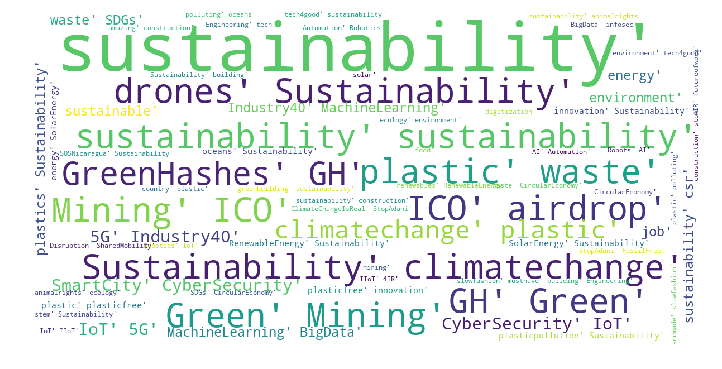

In [150]:
show_wordcloud(hashtag_words)

In [147]:
sustainability_hashtags = ['sustainability',
 'Sustainability',
 'plastic',
 'climatechange',
 'IoT',
 'environment',
 'waste',
 'energy',
 'Green',
 'innovation',
 'drones',
 'SDGs',
 'tech',
 'SmartCity',
 'job',
 'ICO',
 'Industry40',
 'airdrop',
 'BigData',
 'Mining']

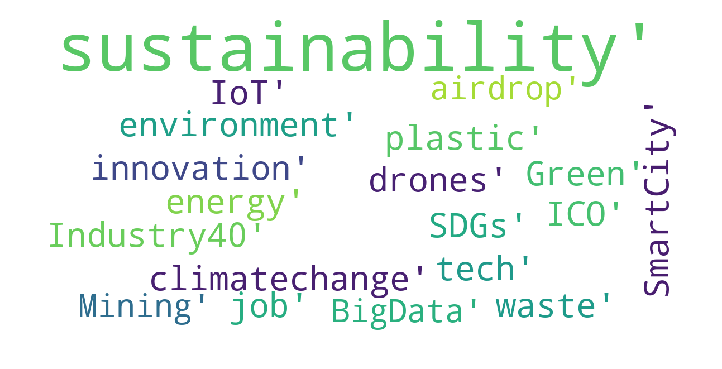

In [148]:
show_wordcloud(sustainability_hashtags)